# import libraries

In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats.mstats import winsorize
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load datasets

In [2]:
movies = pd.read_csv(r"C:\Study (Uni)\Data analysis for business applications\Data sets\tmdb_5000_movies.csv")
credits = pd.read_csv(r"C:\Study (Uni)\Data analysis for business applications\Data sets\tmdb_5000_credits.csv")

## our data splits into 2 csv files
## soo we searched for the unique key that we can use join with

# Merging the datasets

In [3]:

# Inspect the Data

print("Movies shape:", movies.shape)
print("Credits shape:", credits.shape)

print("\nMovies columns:")
print(movies.columns)

print("\nCredits columns:")
print(credits.columns)

Movies shape: (4803, 20)
Credits shape: (4803, 4)

Movies columns:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Credits columns:
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [4]:

# Merge Datasets

# movies.id ↔ credits.movie_id    ( inner join)
df = pd.merge(
    movies,
    credits,
    left_on="id",
    right_on="movie_id",
    how="inner"   # keeps only matching rows
)

# EDA

In [5]:
# as we see we have redundant in the movie_id column soo we should remove this redundant [ id , movie_id ]

df.shape
df.columns
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [7]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [8]:
(df.isna().sum() / len(df)) * 100

budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title_x                  0.000000
vote_average             0.000000
vote_count               0.000000
movie_id                 0.000000
title_y                  0.000000
cast                     0.000000
crew                     0.000000
dtype: float64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
print(df['revenue'].describe())
print(df['revenue'].isna().sum())
print(df['revenue'].head())


count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64
0
0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64


In [11]:
total_rows = len(df)
zero_rev = (df['revenue'] == 0).sum()
print("Total rows:", total_rows)
print("Rows with revenue = 0:", zero_rev)
print("Percentage of zeros:", zero_rev / total_rows * 100)


Total rows: 4803
Rows with revenue = 0: 1427
Percentage of zeros: 29.710597543202166


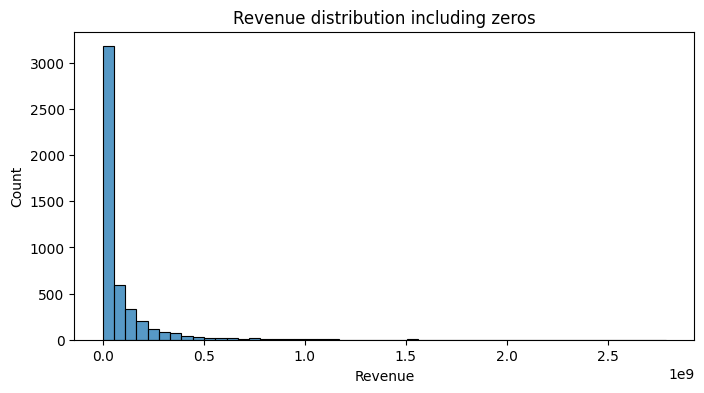

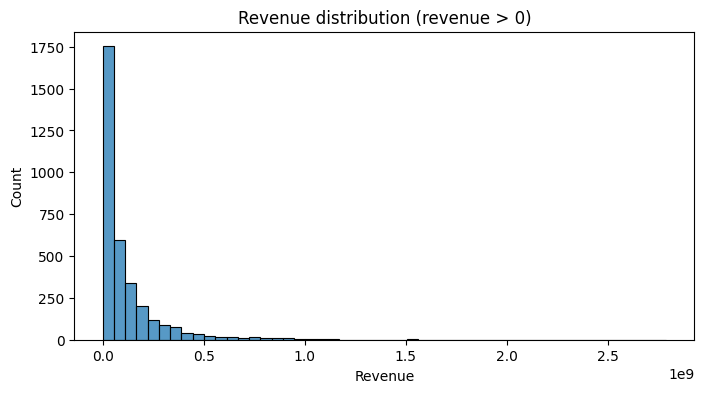

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df['revenue'], bins=50)
plt.title("Revenue distribution including zeros")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()
# Comment: Visualize the skewed distribution of revenue when zeros are included.


plt.figure(figsize=(8,4))
sns.histplot(df[df['revenue'] > 0]['revenue'], bins=50)
plt.title("Revenue distribution (revenue > 0)")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()
# Comment: Visualize the revenue distribution after removing rows with revenue = 0 to see a more realistic pattern.

In [13]:
df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [14]:
(df['popularity'] == 0).sum(), len(df), (df['popularity'] == 0).mean()*100
# Comment:
# Only 1 movie has popularity = 0.
# This is a very small proportion of the data, so we treat it as a valid rare case,
# not as missing data. No special cleaning is required for zero popularity.

(np.int64(1), 4803, np.float64(0.020820320632937747))

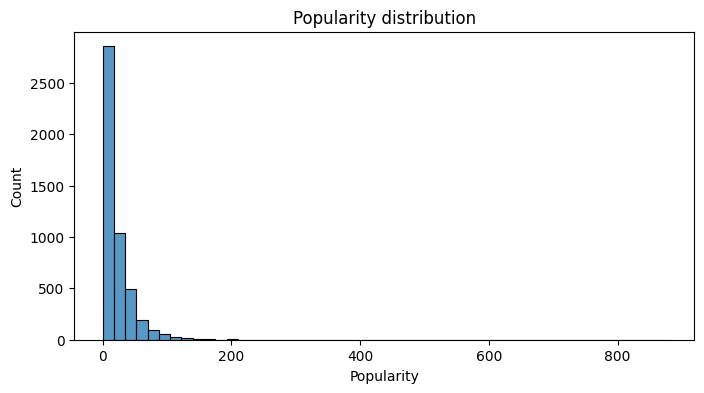

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['popularity'], bins=50)
plt.title("Popularity distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

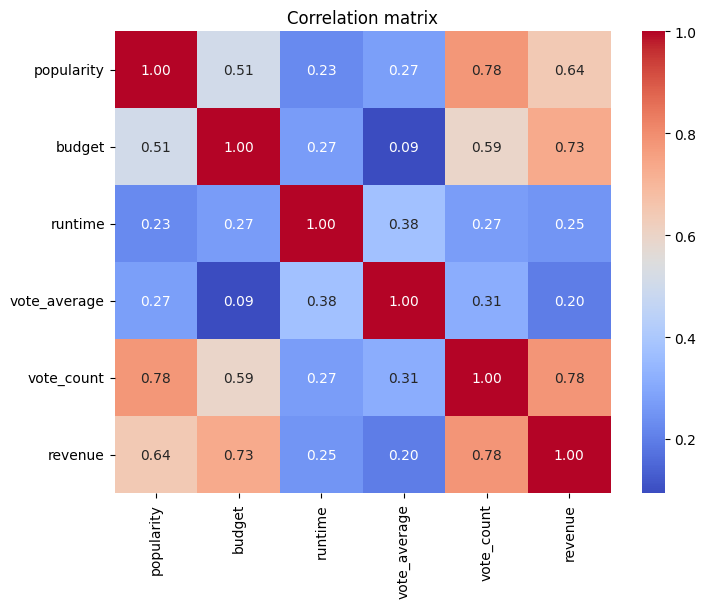

In [16]:
num_cols = ['popularity','budget', 'runtime',
            'vote_average', 'vote_count',
            'revenue']   # added revenue

corr = df[num_cols].corr()   # Pearson correlation matrix

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [17]:
df['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

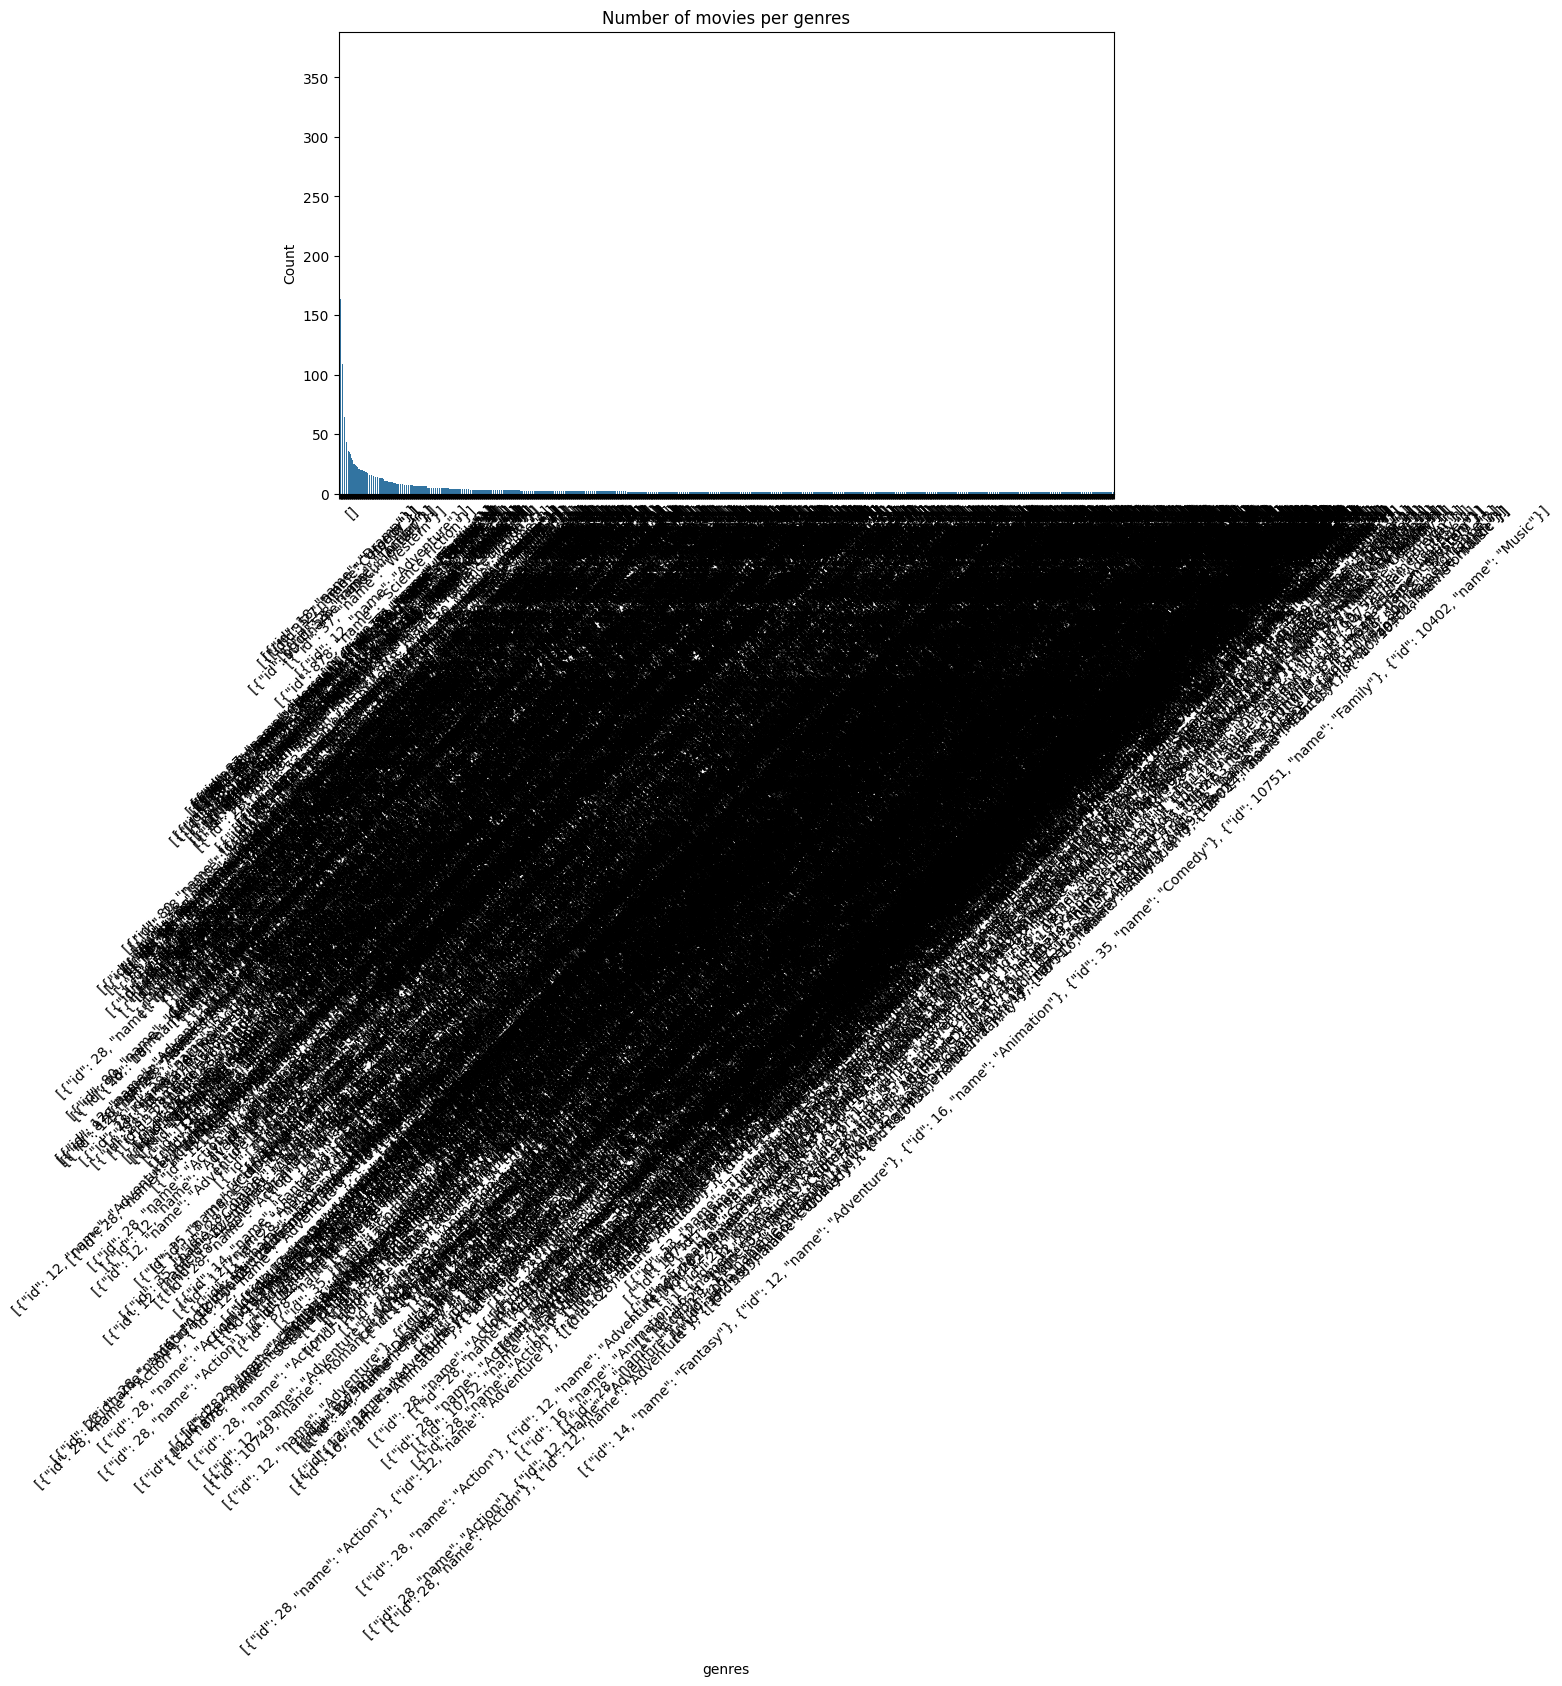

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='genres',
              order=df['genres'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of movies per genres")
plt.xlabel("genres")
plt.ylabel("Count")
plt.show()

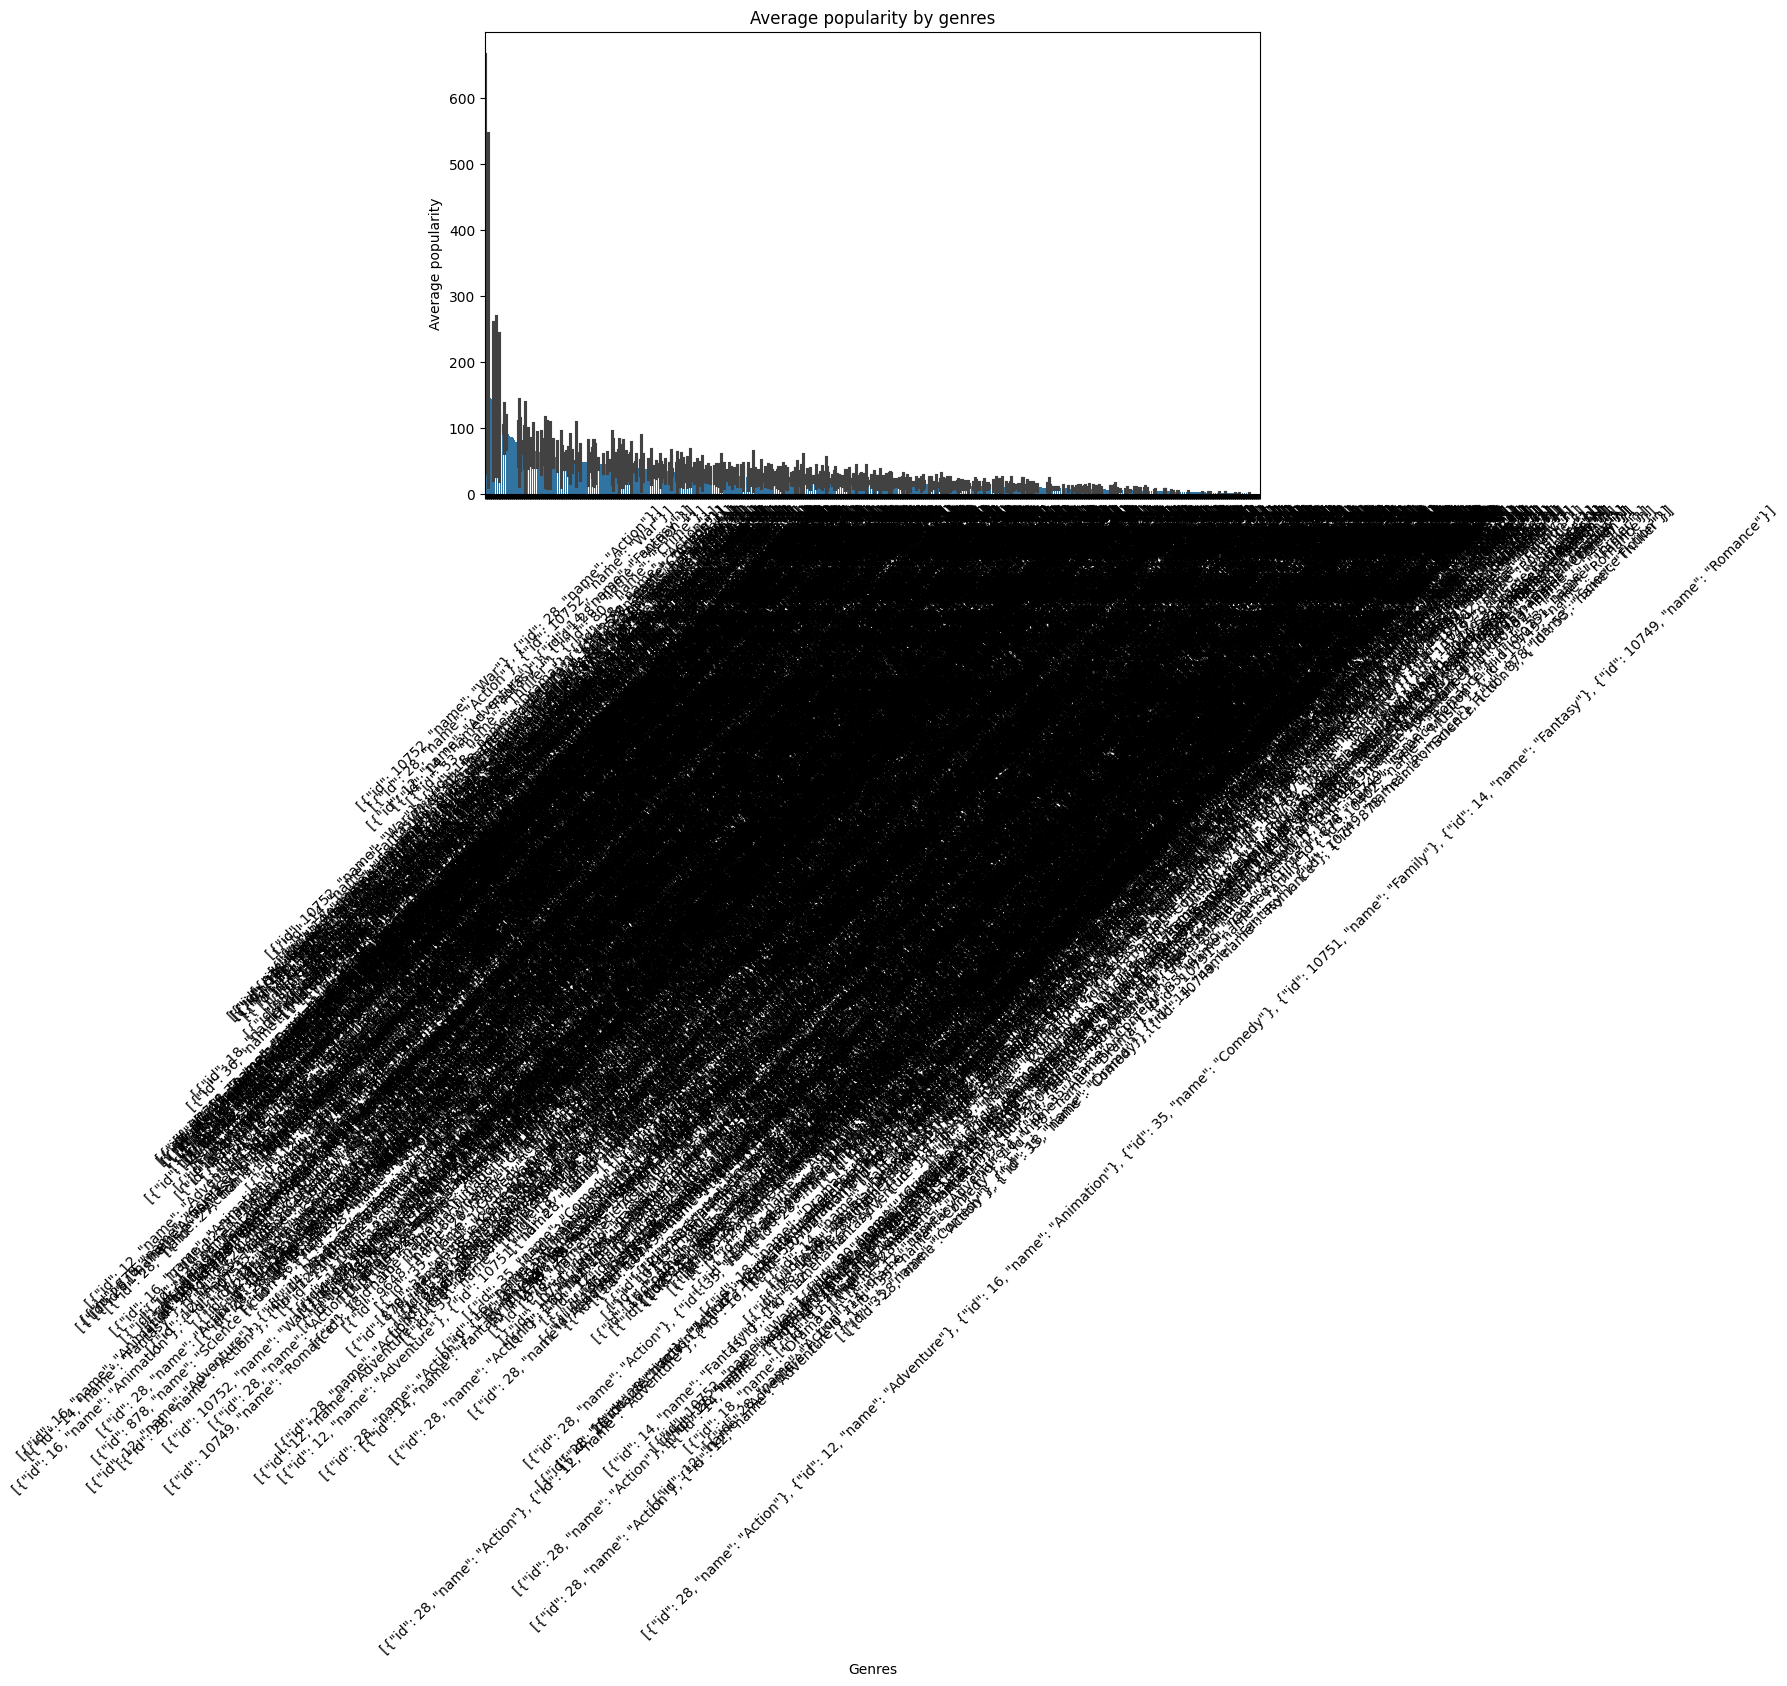

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='genres', y='popularity',
            estimator=np.mean,
            order=df.groupby('genres')['popularity'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title("Average popularity by genres")
plt.xlabel("Genres")
plt.ylabel("Average popularity")
plt.show()


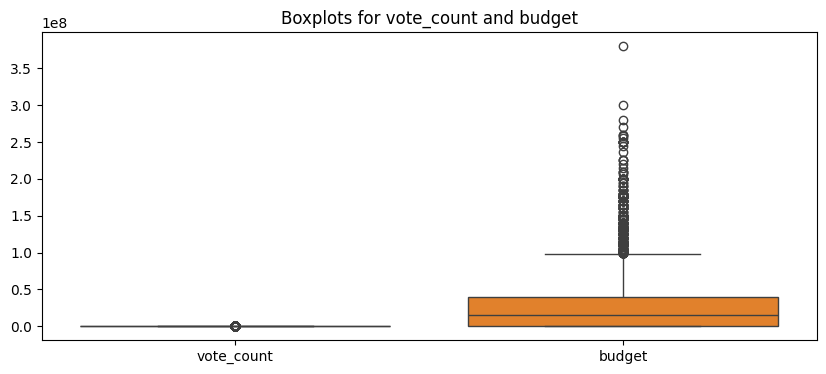

In [20]:

# Boxplots of vote_count and budget to visualize their distributions,
# highlight the median and spread, and detect extreme outliers
# that may heavily influence summary statistics or models.

plt.figure(figsize=(10,4))
sns.boxplot(data=df[['vote_count', 'budget']])
plt.title("Boxplots for vote_count and budget")
plt.show()


#The boxplots show that budget has many extreme high outliers compared to vote_count, indicating a few movies with very large budgets that are far above the typical range.

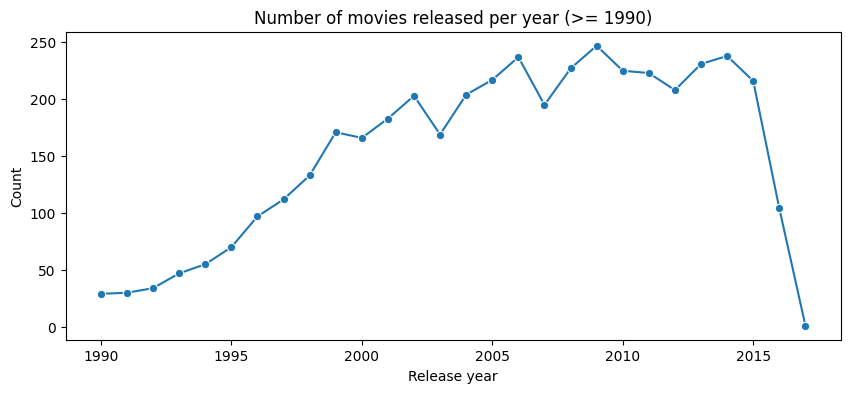

In [21]:
# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Keep recent years only (e.g. >= 1990) to avoid crowded x-axis
recent = df[df['release_year'] >= 1990]

movies_per_year = recent.groupby('release_year')['id'].count()

plt.figure(figsize=(10,4))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title("Number of movies released per year (>= 1990)")
plt.xlabel("Release year")
plt.ylabel("Count")
plt.show()


Text(0.5, 1.0, 'Budget distribution')

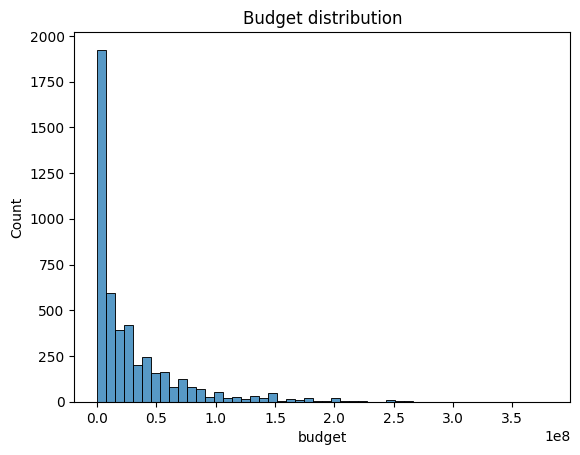

In [22]:
(df['budget'] == 0).sum()
sns.histplot(df['budget'], bins=50); plt.title('Budget distribution')

<Axes: xlabel='budget'>

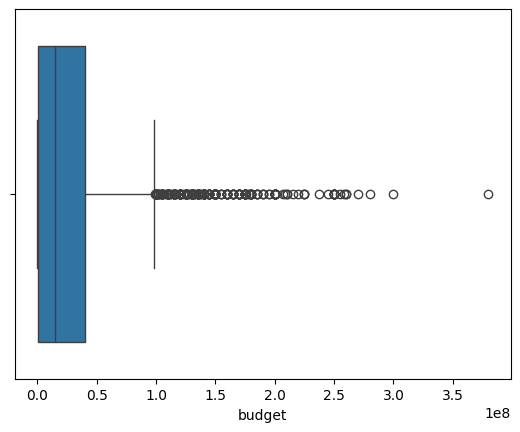

In [23]:
sns.boxplot(x=df['budget'])

Text(0.5, 1.0, 'Runtime distribution')

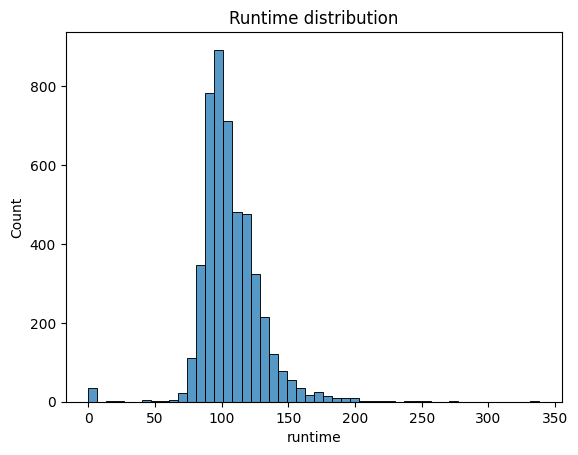

In [24]:
(df['runtime'] == 0).sum()
sns.histplot(df['runtime'], bins=50); plt.title('Runtime distribution')

<Axes: xlabel='runtime'>

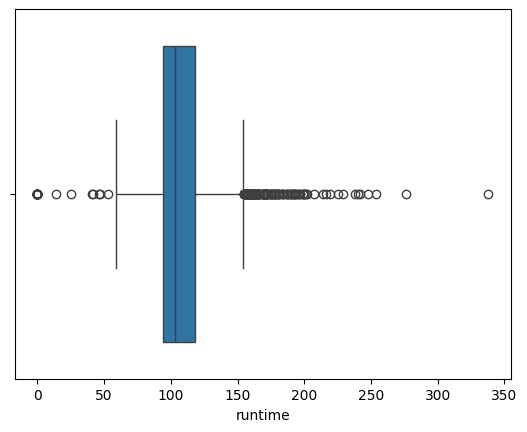

In [25]:
sns.boxplot(x=df['runtime'])

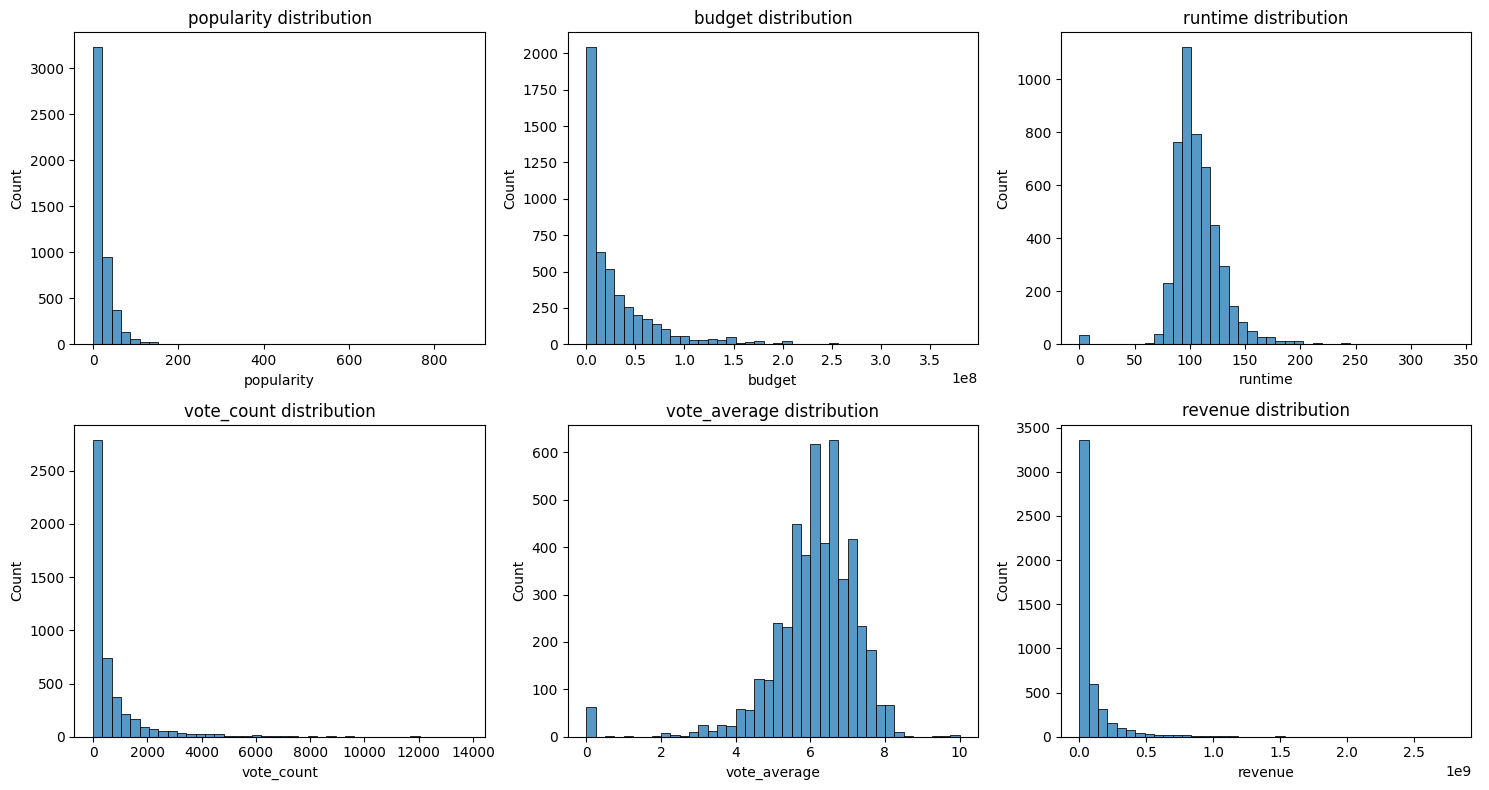

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
cols = ['popularity', 'budget', 'runtime', 'vote_count', 'vote_average', 'revenue']

for ax, col in zip(axes.flatten(), cols):
    sns.histplot(df[col], bins=40, ax=ax)
    ax.set_title(f"{col} distribution")
plt.tight_layout()
plt.show()

# Preprocessing

In [27]:
def extract_first_genre(g):
    # Convert string to Python list safely
    try:
        genres_list = ast.literal_eval(g)

        # Return first genre if list is not empty
        if len(genres_list) > 0:
            return genres_list[0]['name']
    except:
        # Handle missing or invalid values
        return None


# Create a new column with the main (first) genre
df['main_genre'] = df['genres'].apply(extract_first_genre)

In [28]:
# The 'genres' column is stored as a JSON-like string
# (e.g. '[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]').
# We use ast.literal_eval to safely convert this string into a Python list of dicts,
# then extract only the first genre name for each movie and store it in 'main_genre'.
# This gives each movie a single, clean main genre that we can easily use in EDA
# (value_counts, groupby, plots, etc.) instead of working with complex JSON text.

df['main_genre'].value_counts()

main_genre
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: count, dtype: int64

In [29]:
df.drop(columns=['homepage'], inplace=True)

In [30]:
# movie_id is now duplicated with id
df.drop(columns=["movie_id"], inplace=True)

In [31]:
df.drop(columns=["overview"], inplace=True)

In [32]:
df.drop(columns=['title_x', 'title_y'], inplace=True)

# cleaning for key words

In [33]:
df["keywords"] = df["keywords"].apply(ast.literal_eval)

In [34]:
df["keywords"] = df["keywords"].apply(
    lambda x: ", ".join([g["name"] for g in x]) if isinstance(x, list) else ""
)


In [35]:
df["keywords"]

0       culture clash, future, space war, space colony...
1       ocean, drug abuse, exotic island, east india t...
2       spy, based on novel, secret agent, sequel, mi6...
3       dc comics, crime fighter, terrorist, secret id...
4       based on novel, mars, medallion, space travel,...
                              ...                        
4798    united states–mexico barrier, legs, arms, pape...
4799                                                     
4800    date, love at first sight, narration, investig...
4801                                                     
4802              obsession, camcorder, crush, dream girl
Name: keywords, Length: 4803, dtype: object

In [36]:
df['keywords'] = df['keywords'].str.split(',').str[:1].str.join(',')

In [37]:
df['keywords'] = df['keywords'].str.strip().replace(['', '..','/','\\'], np.nan)

In [38]:
df['keywords'].isna().sum()

np.int64(412)

In [39]:
df['keywords'].fillna("Unknown")

0                      culture clash
1                              ocean
2                                spy
3                          dc comics
4                     based on novel
                    ...             
4798    united states–mexico barrier
4799                         Unknown
4800                            date
4801                         Unknown
4802                       obsession
Name: keywords, Length: 4803, dtype: object

In [40]:
df['keywords'].isna().sum()

np.int64(412)

# Cleaning for Cast

In [41]:
df['cast'] # its dict

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4798    [{"cast_id": 1, "character": "El Mariachi", "c...
4799    [{"cast_id": 1, "character": "Buzzy", "credit_...
4800    [{"cast_id": 8, "character": "Oliver O\u2019To...
4801    [{"cast_id": 3, "character": "Sam", "credit_id...
4802    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4803, dtype: object

In [42]:
df["cast"] = df["cast"].apply(ast.literal_eval)

In [43]:
df["cast"] = df["cast"].apply(
    lambda x: ", ".join([g["name"] for g in x]) if isinstance(x, list) else ""
)


In [44]:
df["cast"]

0       Sam Worthington, Zoe Saldana, Sigourney Weaver...
1       Johnny Depp, Orlando Bloom, Keira Knightley, S...
2       Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...
3       Christian Bale, Michael Caine, Gary Oldman, An...
4       Taylor Kitsch, Lynn Collins, Samantha Morton, ...
                              ...                        
4798    Carlos Gallardo, Jaime de Hoyos, Peter Marquar...
4799    Edward Burns, Kerry Bishé, Marsha Dietlein, Ca...
4800    Eric Mabius, Kristin Booth, Crystal Lowe, Geof...
4801    Daniel Henney, Eliza Coupe, Bill Paxton, Alan ...
4802    Drew Barrymore, Brian Herzlinger, Corey Feldma...
Name: cast, Length: 4803, dtype: object

In [45]:
df['cast'] = df['cast'].str.split(',').str[:1].str.join(',')

In [46]:
df.rename(columns={'cast': 'Actor'}, inplace=True)

In [47]:
df['Actor'] = df['Actor'].str.strip().replace(['', '..','/','\\'], np.nan)

In [48]:
df['Actor'].isna().sum()

np.int64(43)

Cleaning for ID

In [49]:
df['id'].astype(int)

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: id, Length: 4803, dtype: int64

In [50]:
df['crew']

0       [{"credit_id": "52fe48009251416c750aca23", "de...
1       [{"credit_id": "52fe4232c3a36847f800b579", "de...
2       [{"credit_id": "54805967c3a36829b5002c41", "de...
3       [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4       [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
                              ...                        
4798    [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4799    [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800    [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801    [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802    [{"credit_id": "58ce021b9251415a390165d9", "de...
Name: crew, Length: 4803, dtype: object

In [51]:
df["crew"] = df["crew"].apply(ast.literal_eval)

In [52]:
df["crew"] = df["crew"].apply(
    lambda x: ", ".join([g["name"] for g in x]) if isinstance(x, list) else ""
)

In [53]:
df['crew'] = df['crew'].str.split(',').str[:1].str.join(',')

In [54]:
df.rename(columns={'crew': 'Director'}, inplace=True)

In [55]:
df['Director']

0       Stephen E. Rivkin
1          Dariusz Wolski
2           Thomas Newman
3             Hans Zimmer
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800        Carla Hetland
4801          Daniel Hsia
4802       Clark Peterson
Name: Director, Length: 4803, dtype: object

# **Cleaning for Popularity**

In [56]:
# Check distribution and basic statistics
df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [57]:
df['popularity'] = df['popularity'].replace(0, np.nan)

In [58]:
df["popularity"].isna().sum()

np.int64(1)

In [59]:
# Fill missing popularity values using the median
# Median is robust to extreme outliers
df['popularity'] = df['popularity'].fillna(df['popularity'].median())

In [60]:
df["popularity"].isna().sum()

np.int64(0)

In [61]:
# Popularity is usually highly right-skewed
# Apply log transformation to reduce skewness
df['popularity_log'] = np.log1p(df['popularity'])

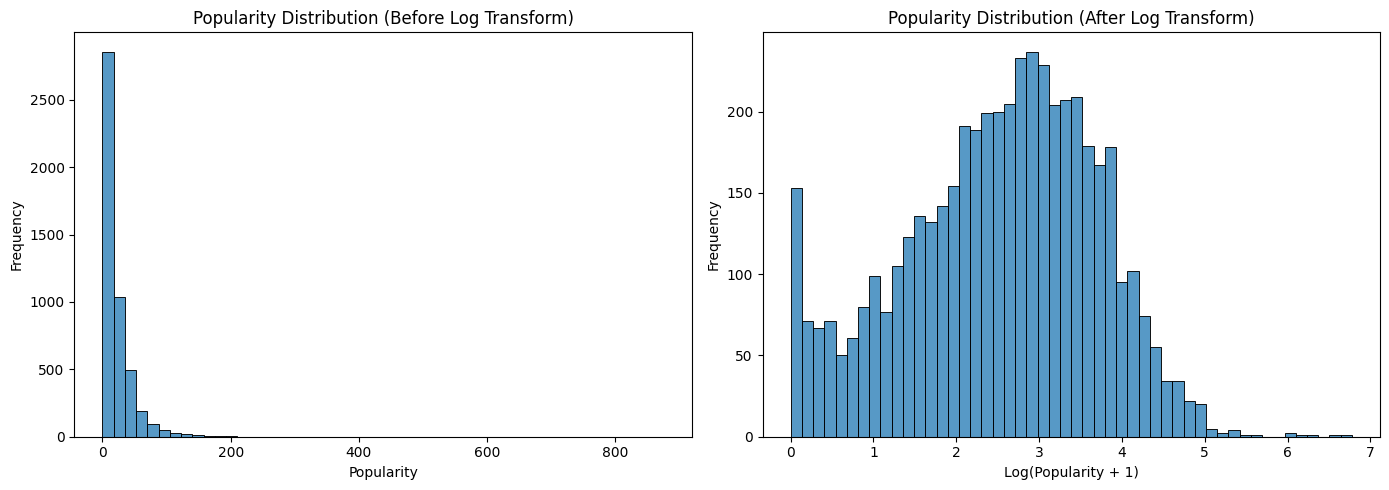

In [62]:
plt.figure(figsize=(14,5))

# Before log transform
plt.subplot(1, 2, 1)
sns.histplot(df['popularity'], bins=50)
plt.title('Popularity Distribution (Before Log Transform)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# After log transform
plt.subplot(1, 2, 2)
sns.histplot(df['popularity_log'], bins=50)
plt.title('Popularity Distribution (After Log Transform)')
plt.xlabel('Log(Popularity + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


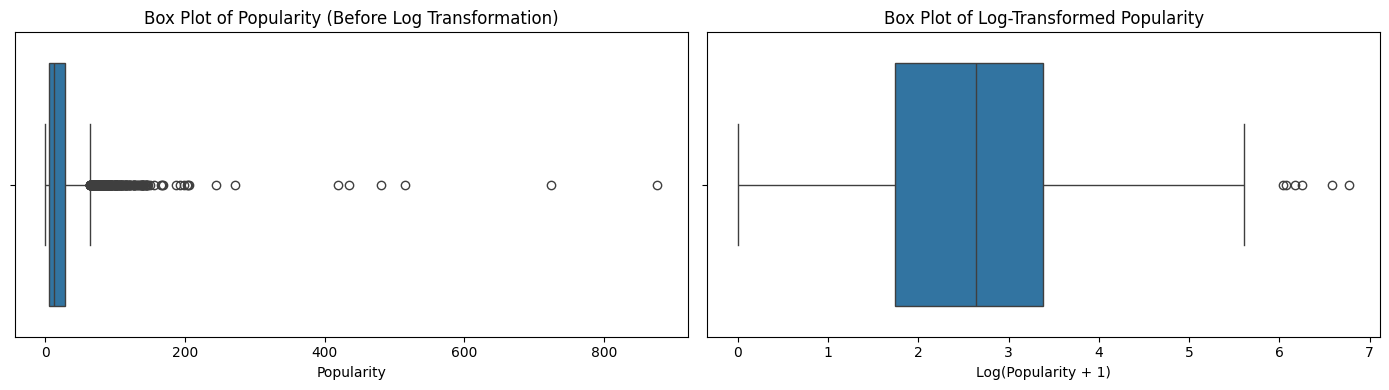

In [63]:
plt.figure(figsize=(14,4))

# Before log transform
plt.subplot(1, 2, 1)
sns.boxplot(x=df['popularity'])
plt.title('Box Plot of Popularity (Before Log Transformation)')
plt.xlabel('Popularity')

# After log transform
plt.subplot(1, 2, 2)
sns.boxplot(x=df['popularity_log'])
plt.title('Box Plot of Log-Transformed Popularity')
plt.xlabel('Log(Popularity + 1)')

plt.tight_layout()
plt.show()


# Cleaning for Original language


In [64]:
# Check missing values in original_language
df['original_language'].isna().sum()
#Checking again after the EDA

np.int64(0)

In [65]:
# Number of unique languages
df['original_language'].nunique()

37

In [66]:
# Check for duplicated titles
# Duplicate titles are allowed because different movies can share names
df['original_title'].duplicated().sum()

np.int64(2)

In [67]:
# Frequency of each language
df['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

In [68]:
# Ensure column is clean text
df['original_language'] = df['original_language'].astype(str).str.strip()

# Recalculate counts
lang_counts = df['original_language'].value_counts()

# Identify rare languages
rare_languages = lang_counts[lang_counts < 50].index

# Replace rare languages with 'other'
df.loc[df['original_language'].isin(rare_languages), 'original_language'] = 'other'

In [69]:
df['original_language'].value_counts()

original_language
en       4505
other     228
fr         70
Name: count, dtype: int64

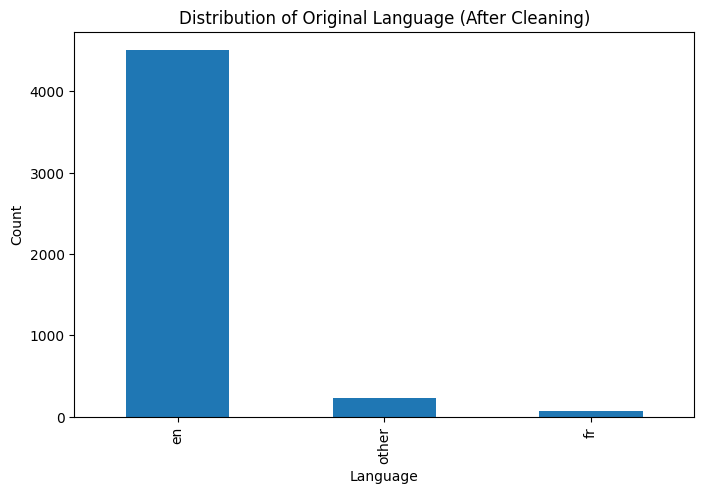

In [70]:
plt.figure(figsize=(8,5))
df['original_language'].value_counts().plot(kind='bar')

plt.title('Distribution of Original Language (After Cleaning)')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


In [71]:
df = pd.get_dummies(
    df,
    columns=['original_language'],
    drop_first=True
)

In [72]:
df.filter(like='original_language').head()

,original_language_fr,original_language_other
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


# Cleaning for Original titles

In [73]:
df['original_title'].isna().sum()

np.int64(0)

In [74]:
df['original_title'].duplicated().sum()

np.int64(2)

In [75]:
# Create title length for analysis only
df['title_length'] = df['original_title'].str.len()

df['title_length'].describe()

count    4803.000000
mean       15.222986
std         8.488228
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        86.000000
Name: title_length, dtype: float64

# Cleaning for Production countries

In [76]:
df['production_countries'].head()

0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
2    [{"iso_3166_1": "GB", "name": "United Kingdom"...
3    [{"iso_3166_1": "US", "name": "United States o...
4    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, dtype: object

In [77]:
df['production_countries'].isna().sum()


np.int64(0)

In [78]:
# This function extracts the main (first) production country from the column
# 'production_countries', which contains strings that look like lists of dictionaries
def extract_main_country(x):

    # Use try-except to avoid errors if the value is malformed or missing
    try:
        # Convert the string into an actual Python object (list/dictionary)
        countries = ast.literal_eval(x)

        # Check if the result is a list and it is not empty
        if isinstance(countries, list) and len(countries) > 0:

            # Extract the 'name' of the first country
            # The first country is considered the main production country
            return countries[0]['name']

        else:
            # If the list is empty, return a placeholder
            return 'Unknown'

    except:
        # If conversion fails (e.g., NaN, invalid format), return a placeholder
        return 'Unknown'

# Apply the function
df['main_production_country'] = df['production_countries'].apply(extract_main_country)

In [79]:
df['main_production_country'].value_counts().head(15)

main_production_country
United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
France                       174
Unknown                      174
Australia                     87
India                         42
China                         40
Spain                         34
Japan                         34
Italy                         26
Ireland                       22
New Zealand                   22
Hong Kong                     22
Name: count, dtype: int64

In [80]:
# Count frequencies
country_counts = df['main_production_country'].value_counts()

# Define rare countries (less than 50 movies)
rare_countries = country_counts[country_counts < 50].index

# Group rare countries into 'Other'
df.loc[
    df['main_production_country'].isin(rare_countries),
    'main_production_country'
] = 'Other'

df['main_production_country'].value_counts()

main_production_country
United States of America    3102
Other                        472
United Kingdom               374
Canada                       220
Germany                      200
France                       174
Unknown                      174
Australia                     87
Name: count, dtype: int64

In [81]:
# Apply one-hot encoding to the 'main_production_country' column
# This converts categorical country names into binary (0/1) columns
# drop_first=True avoids multicollinearity by using one country as a reference category
df = pd.get_dummies(
    df,
    columns=['main_production_country'],
    drop_first=True
)

In [82]:
# Convert boolean values (True/False) created by one-hot encoding into integers (1/0)
# This ensures consistency and compatibility with machine learning models
df = df.astype({
    col: int
    for col in df.columns
    if col.startswith('main_production_country_')
})

In [83]:
# Drop the original 'production_countries' column
# This column contains nested, non-tidy data and is no longer needed
# because the main production country has already been extracted and encoded
df = df.drop(columns=['production_countries'])

/

# Cleaning for Run time

In [84]:

df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df.loc[df['runtime'] == 0, 'runtime'] = np.nan


In [85]:
df['runtime'].isna().sum()


np.int64(37)

In [86]:
knn_cols = ['runtime', 'budget', 'popularity', 'vote_average']
imputer = KNNImputer(n_neighbors=5)
df[knn_cols] = imputer.fit_transform(df[knn_cols])

In [87]:
df["runtime"].isna().sum()

np.int64(0)

In [88]:
df["runtime_log"] = np.log1p(df["runtime"])

In [89]:
import numpy as np
from scipy.stats.mstats import winsorize
df["runtime_log"] = np.log1p(df["runtime"])
df["runtime_log"] = winsorize(df["runtime_log"], limits=[0.05, 0.05])

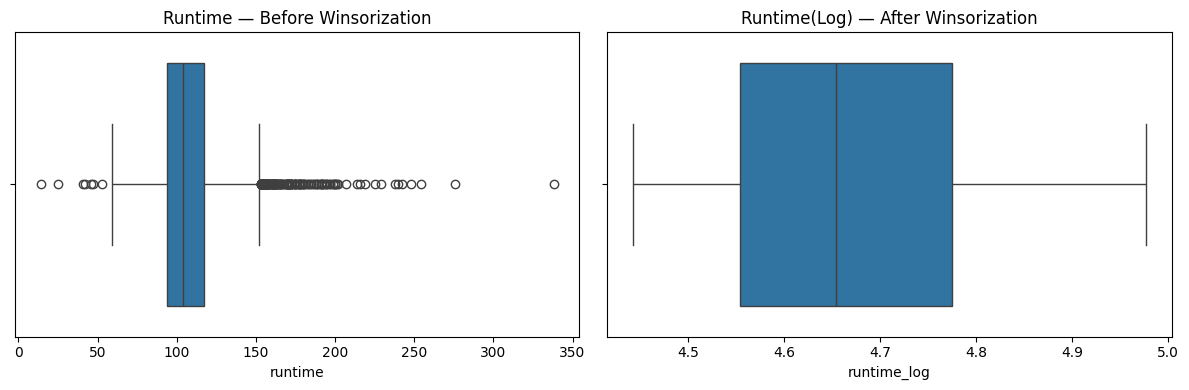

In [90]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["runtime"])
plt.title("Runtime — Before Winsorization")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["runtime_log"])
plt.title("Runtime(Log) — After Winsorization")

plt.tight_layout()
plt.show()


# Cleaning Tag line

In [91]:
df['tagline'] = df['tagline'].fillna('No tagline')

In [92]:
df["tagline"].isnull().sum()

np.int64(0)

In [93]:
df["tagline"]

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
                              ...                        
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4800                                           No tagline
4801                             A New Yorker in Shanghai
4802                                           No tagline
Name: tagline, Length: 4803, dtype: object

# Cleaning for release date


In [94]:
df[df['release_date'].isna()][['original_title', 'release_date']]


,original_title,release_date
4553,America Is Still the Place,NaT


In [95]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
median_date = df['release_date'].median()
df['release_date'] = df['release_date'].fillna(median_date)

In [96]:
df['release_date'].isna().sum()

np.int64(0)

# Cleaning for Revenue

In [97]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [98]:
df["revenue"]

0       2.787965e+09
1       9.610000e+08
2       8.806746e+08
3       1.084939e+09
4       2.841391e+08
            ...     
4798    2.040920e+06
4799             NaN
4800             NaN
4801             NaN
4802             NaN
Name: revenue, Length: 4803, dtype: float64

In [99]:
df["revenue"].isna().sum()

np.int64(1427)

In [100]:
df = df.replace(0,np.nan)

In [101]:
df["revenue"] = df["revenue"].fillna(df["revenue"].median())

In [102]:
df["revenue"].isna().sum()

np.int64(0)

# Cleaning for vote average

In [103]:
df["vote_average"].isna().sum()

np.int64(63)

In [104]:
df["vote_average"] = df["vote_average"].fillna(df["vote_average"].mean())

In [105]:
# Log transform (no missing values now)
vote_log = np.log1p(df["vote_average"])

# Winsorize
vote_log_win = winsorize(vote_log, limits=[0.05, 0.05])
vote_log_win = np.array(vote_log_win)

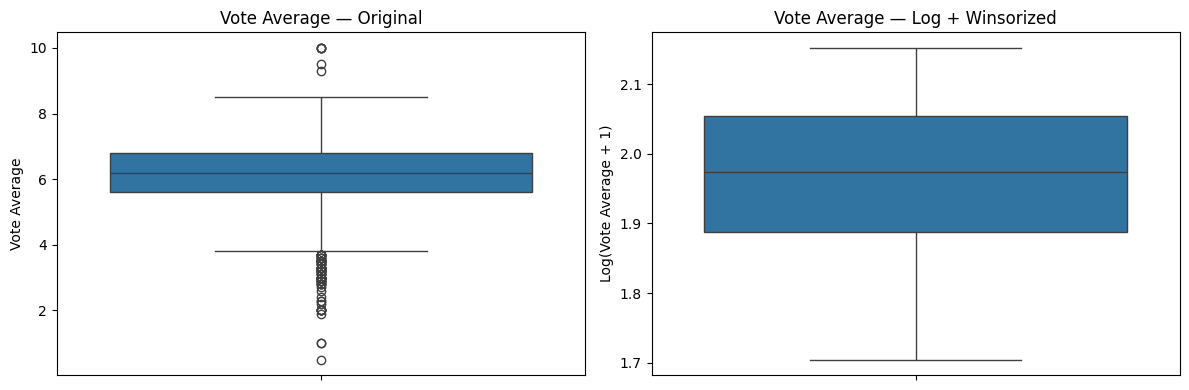

In [106]:
# Side-by-side boxplots
plt.figure(figsize=(12,4))

# Before (original)
plt.subplot(1, 2, 1)
sns.boxplot(y=df["vote_average"])
plt.title("Vote Average — Original")
plt.ylabel("Vote Average")

# After (log + winsorized)
plt.subplot(1, 2, 2)
sns.boxplot(y=vote_log_win)
plt.title("Vote Average — Log + Winsorized")
plt.ylabel("Log(Vote Average + 1)")

plt.tight_layout()
plt.show()


# Cleaning for vote Count

In [107]:
df["vote_count"].isna().sum()

np.int64(62)

In [108]:
df["vote_count"] = df["vote_count"].fillna(df["vote_count"].median())

In [109]:
# Log transform
df["vote_count_log"] = np.log1p(df["vote_count"])

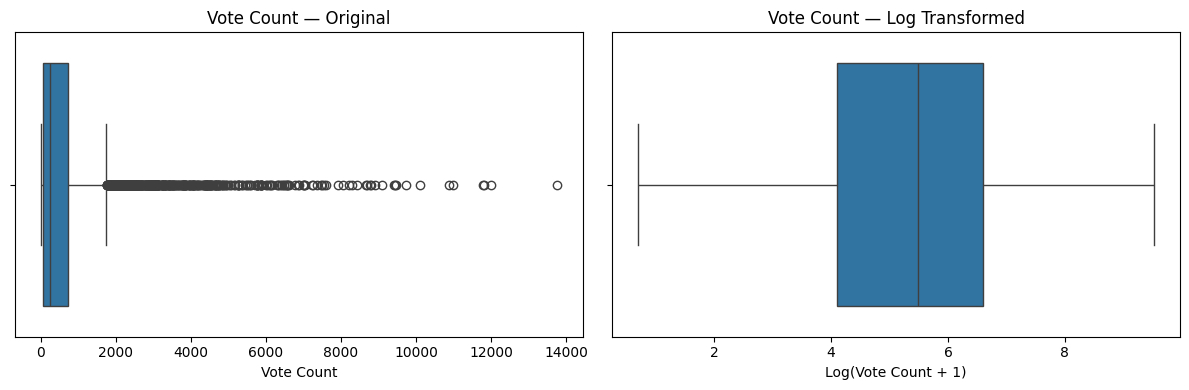

In [110]:
# Side-by-side boxplots
plt.figure(figsize=(12,4))

# Before log transform
plt.subplot(1, 2, 1)
sns.boxplot(x=df["vote_count"])
plt.title("Vote Count — Original")
plt.xlabel("Vote Count")

# After log transform
plt.subplot(1, 2, 2)
sns.boxplot(x=df["vote_count_log"])
plt.title("Vote Count — Log Transformed")
plt.xlabel("Log(Vote Count + 1)")

plt.tight_layout()
plt.show()


# Cleaning for Budget

In [111]:
df["budget"].describe()
#The descriptive statistics of the budget

count    3.766000e+03
mean     3.704284e+07
std      4.264651e+07
min      1.000000e+00
25%      8.000000e+06
50%      2.300000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [112]:
median_budget =df['budget'].median()
df['budget'] =df['budget'].fillna(median_budget)

In [113]:
# Apply Box-Cox
budget_transformed, lambda_val = stats.boxcox(df['budget'])

# Add transformed data to dataframe
df['budget_boxcox'] = budget_transformed

print(f"Optimal lambda: {lambda_val}")

Optimal lambda: 0.28629865215741973


C:\Users\a\AppData\Local\Temp\ipykernel_23908\385135910.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


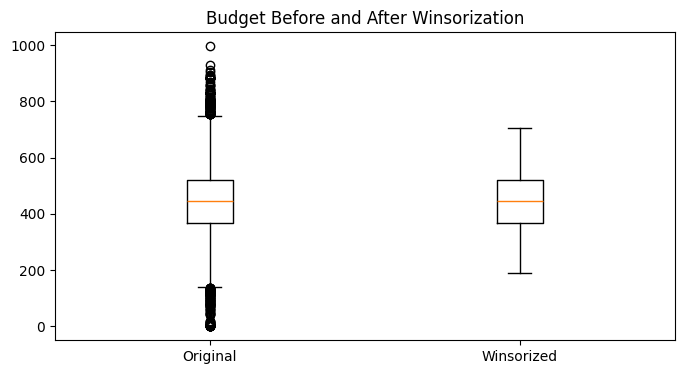

In [114]:
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

# Apply winsorization to the budget column
# This caps the lowest 5% and highest 5% of budget values
# instead of removing them, reducing the influence of extreme outliers
wins_budget = winsorize(df['budget_boxcox'], limits=[0.05, 0.05])

# Create a figure to compare original and winsorized budgets
plt.figure(figsize=(8, 4))


plt.boxplot(
    [df['budget_boxcox'], wins_budget],
    labels=['Original', 'Winsorized']
)


plt.title("Budget Before and After Winsorization")


plt.show()

In [115]:
df["budget"].describe()

count    4.803000e+03
mean     3.401089e+07
std      3.820157e+07
min      1.000000e+00
25%      1.200000e+07
50%      2.300000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

label encoding for the status column

In [116]:
from sklearn.preprocessing import LabelEncoder  # Converts categorical labels to numbers

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the 'status' column and transform it into numeric labels

encoded_status = le.fit_transform(df["status"])

**Model**

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['budget', 'revenue', 'vote_count']]  # features
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Predictions sample:", y_pred[:5])
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Predictions sample: [ 13.07581676   8.01295275   8.31766208  27.56223556 121.719833  ]
R^2: 0.5865237803019718
MSE: 511.2876310483924
Intercept: 6.816165971204686
Coefficients: [1.03863832e-08 1.25894114e-08 1.89966134e-02]


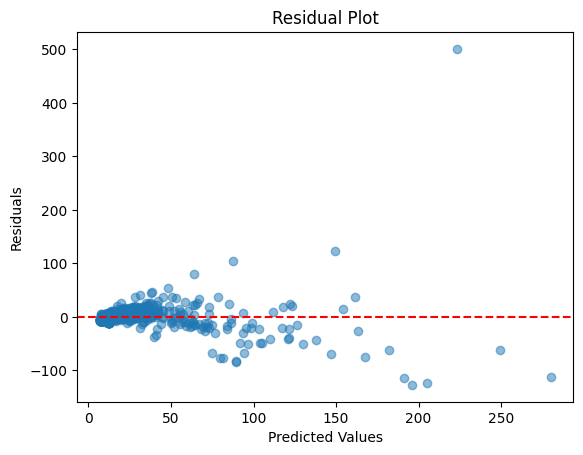

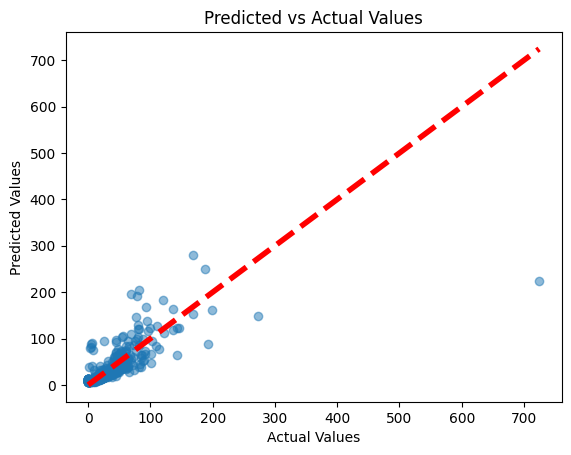

In [118]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Predicted vs Actual Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.show()

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2019.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:43:34   Log-Likelihood:                -16815.
No. Observations:                3842   AIC:                         3.364e+04
Df Residuals:                    3838   BIC:                         3.366e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8162      0.419     16.283      0.0

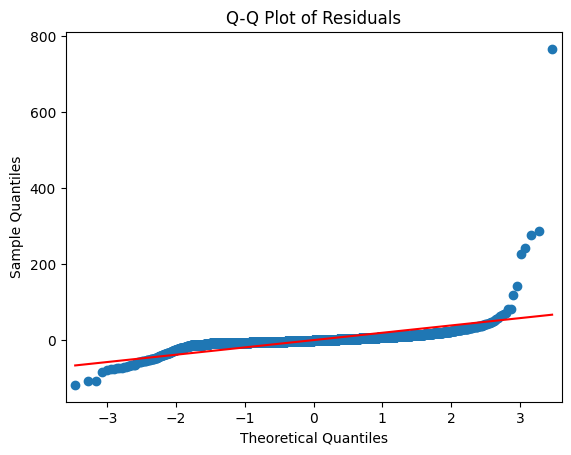

In [119]:
import statsmodels.api as sm

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Q-Q Plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# There is no serious multicollinearity among the predictors, as all VIF values are below 3.

      feature       VIF
0      budget  2.819343
1     revenue  4.547647
2  vote_count  3.162754


In [121]:
import statsmodels.api as sm

# Fit OLS using statsmodels
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

dw = sm.stats.stattools.durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 1.857383369679237


In [122]:
def remove_outliers_iqr(df, cols, k=1.5):
    kero_no_1 = df.copy()

    for c in cols:
        q1 = kero_no_1[c].quantile(0.25)
        q3 = kero_no_1[c].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - k * iqr
        upper = q3 + k * iqr

        kero_no_1 = kero_no_1[
            (kero_no_1[c] >= lower) & (kero_no_1[c] <= upper)
        ]

    return kero_no_1


kero_no_1 = remove_outliers_iqr(df, ['revenue', 'vote_count'])


C:\Self study\Preproccing practice\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Self study\Preproccing practice\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = kero_no_1[['budget', 'revenue', 'vote_count']]  # features
y = kero_no_1['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Predictions sample:", y_pred[:5])
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Predictions sample: [38.9413662   3.28164788  3.6145933   4.03548958 37.50440989]
R^2: 0.8435081653945686
MSE: 17.60663256729217
Intercept: 2.700437277572311
Coefficients: [ 3.03376028e-08 -7.80130893e-09  3.58972239e-02]


In [124]:
y_train_pred = model.predict(X_train)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test  R^2:", r2_score(y_test,  y_pred))


Train R^2: 0.840316219984006
Test  R^2: 0.8435081653945686


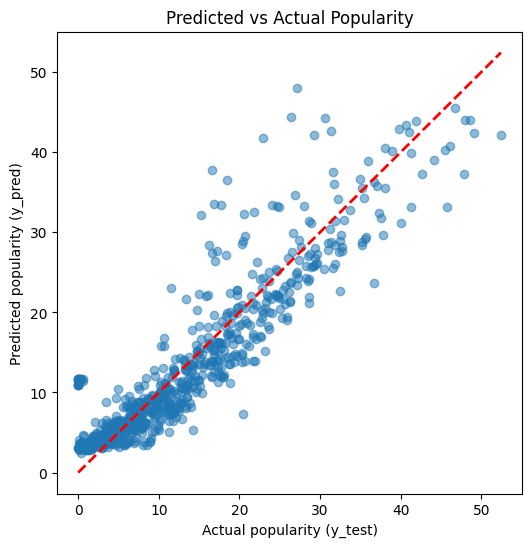

In [125]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual popularity (y_test)")
plt.ylabel("Predicted popularity (y_pred)")
plt.title("Predicted vs Actual Popularity")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.show()


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     5411.
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:43:34   Log-Likelihood:                -8903.1
No. Observations:                3089   AIC:                         1.781e+04
Df Residuals:                    3085   BIC:                         1.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7004      0.139     19.439      0.0

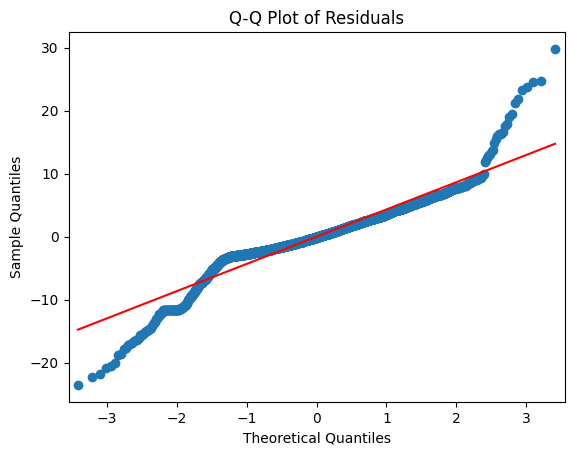

In [126]:
import statsmodels.api as sm

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Q-Q Plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

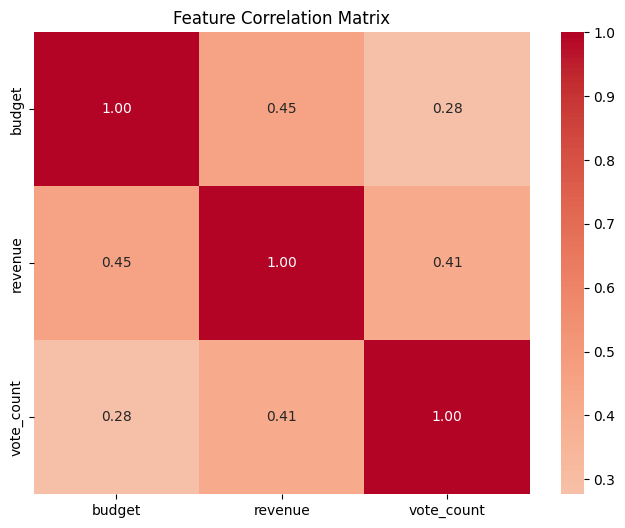

In [127]:

corr = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()
#There is no serious multicollinearity among the predictors, as all Correlation Matrix values are below (0.8) .




In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# There is no serious multicollinearity among the predictors, as all VIF values are below 3.



      feature       VIF
0      budget  2.614109
1     revenue  3.178160
2  vote_count  2.168419


In [129]:
import statsmodels.api as sm

# Fit OLS using statsmodels
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

dw = sm.stats.stattools.durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 1.9233673209997446


**Gradient Boosting**

In [130]:

X = kero_no_1[['revenue', 'budget', 'vote_count']]
y = kero_no_1['popularity']

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)

gbr.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",300
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",4
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in thelef

In [133]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = gbr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.8703977228722135
MSE: 14.58133377390999


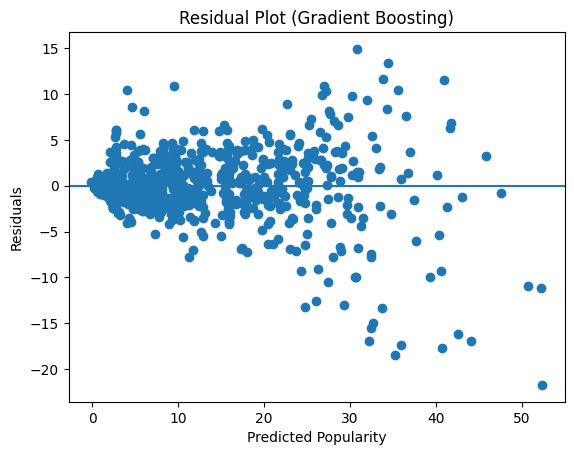

In [134]:

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Popularity")
plt.ylabel("Residuals")
plt.title("Residual Plot (Gradient Boosting)")
plt.show()

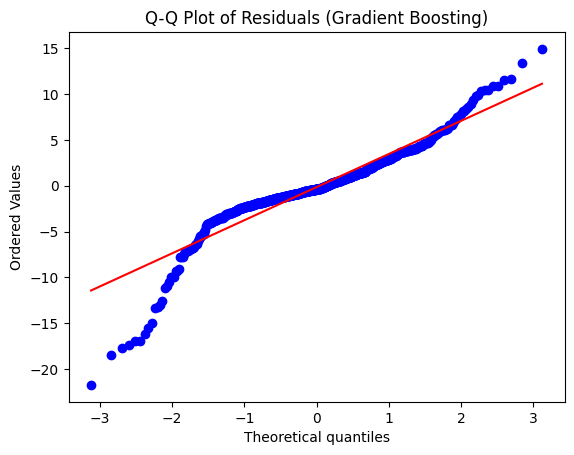

In [135]:
from scipy import stats

plt.figure()
stats.probplot(residuals, plot=plt)
plt.title("Q-Q Plot of Residuals (Gradient Boosting)")
plt.show()

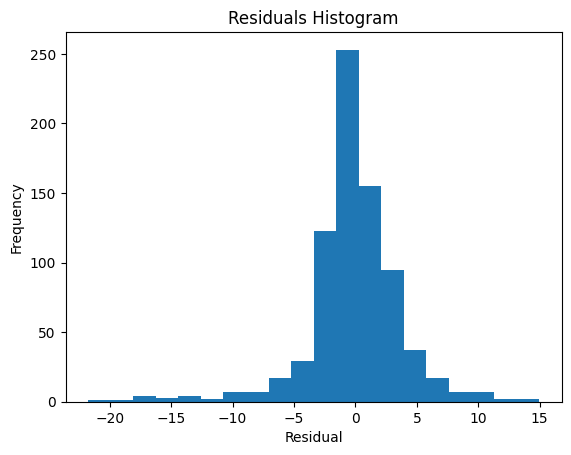

In [136]:
plt.hist(residuals, bins=20)
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [137]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(y_test - y_pred)
print("Durbin-Watson:", dw)

Durbin-Watson: 2.0447230577225697


***Comparison Table***

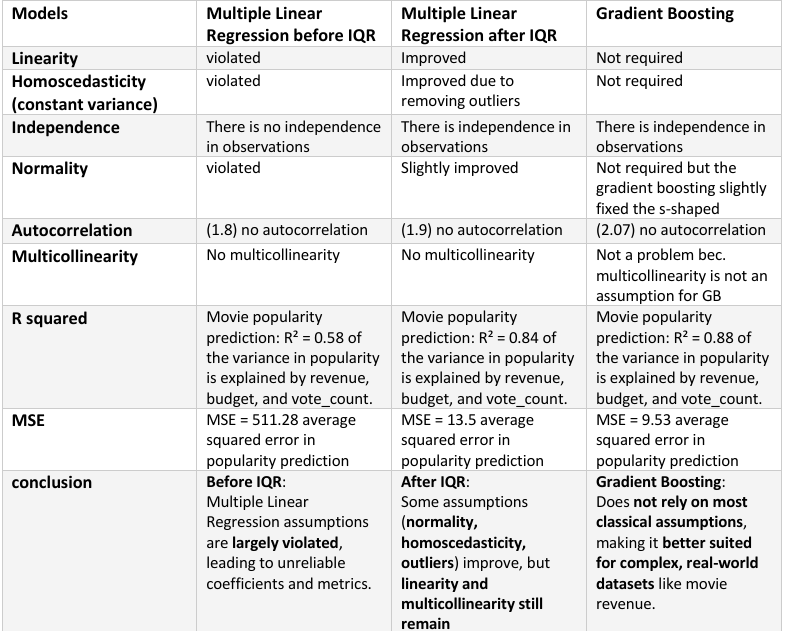

